Name: Kiana Greek
ID: 40135171
COMP 333 Data Analytics
Lab Assignment 1
Description: Using python and pandas to analyze tipping data and create plots of data.
Input: A CSV file containing data on tipping (bill total, tip amount, sex of payer, smoking or non smoking section, party size,
day of the week, and the time of day

In [225]:
#importing pandas
import pandas as pd

#import matplot for graphs to visualize the data
import matplotlib.pyplot as plt

%matplotlib inline

#load the data from tips.csv as a dataframe
df = pd.read_csv('tips.csv')

In [226]:
#print the first 10 rows
df.head(10)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,Female,No,Sun,Dinner,2
1,2,10.34,1.66,Male,No,Sun,Dinner,3
2,3,21.01,3.50,Male,No,Sun,Dinner,3
3,4,23.68,3.31,Male,No,Sun,Dinner,2
4,5,24.59,3.61,Female,No,Sun,Dinner,4
5,6,25.29,4.71,Male,No,Sun,Dinner,4
6,7,8.77,2.00,Male,No,Sun,Dinner,2
7,8,26.88,3.12,Male,No,Sun,Dinner,4
8,9,15.04,1.96,Male,No,Sun,Dinner,2
9,10,14.78,3.23,Male,No,Sun,Dinner,2


data & data type
Total Bill - Ratio
Tip - Ratio
Sex - Nominal
Smoker - Nominal
Day - Nominal
Time - Nominal
Size - Ratio

GRAPH 1 FROM WIKIPEDIA PAGE
---------------------------
histogram of tip amounts in dollar increments using matplot.
10 bins for data and rwidth set to .9 for spacing between the bars.

Text(0, 0.5, 'Count')

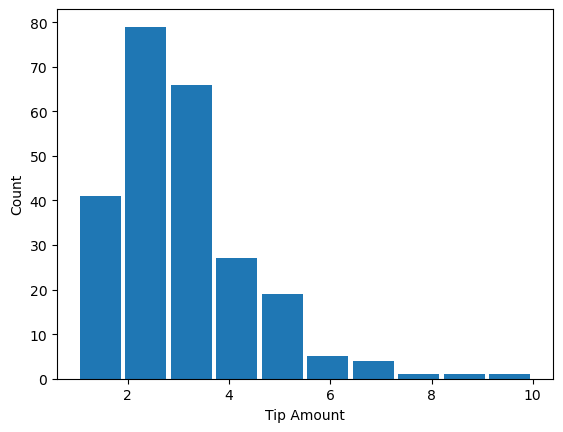

In [227]:
plt.hist(df['tip'],bins = 10, rwidth=.9)
#labeling the axes
plt.xlabel('Tip Amount')
plt.ylabel('Count')

GRAPH 2 FROM WIKIPEDIA PAGE
------------------------------
histogram of tip in dollar amount with 100 bins so its in $0.10 increments using matplot .

Text(0, 0.5, 'Count')

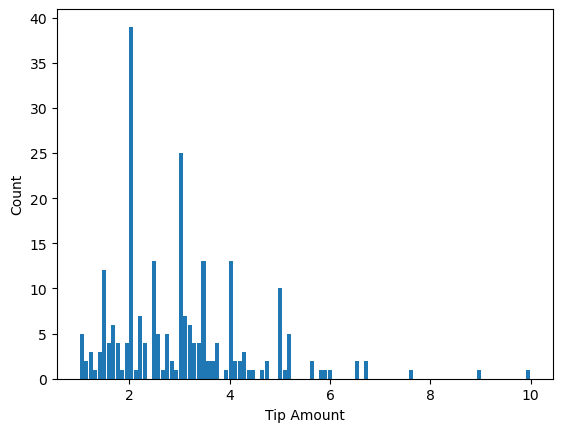

In [228]:
plt.hist(df['tip'],bins = 100, rwidth=.9)
#labeling the axes
plt.xlabel('Tip Amount')
plt.ylabel('Count')

GRAPH 3 FROM WIKIPEDIA PAGE
----------------------------
Add two columns to the date frame to calculate the expected tip using the linear regression equation given in class.
The first new column will calculate the expected rate and the second new column will contain the expected tip based off of the total and the expected rate.
The second column will also be the y values for the linear regression line while the bill total will be the x values.

In [229]:
#y value for regression line is calculated with 0.18-(0.01*party_size)
df.insert(loc=len(df.columns), column="expected_rate", value = 0.18-(0.01*df['size']))
df = df.assign(expected_tip = lambda  e: e.total_bill * e.expected_rate)
#display the first 5 rows of the expanded data frame
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,expected_rate,expected_tip
0,1,16.99,1.01,Female,No,Sun,Dinner,2,0.16,2.7184
1,2,10.34,1.66,Male,No,Sun,Dinner,3,0.15,1.5510
2,3,21.01,3.50,Male,No,Sun,Dinner,3,0.15,3.1515
3,4,23.68,3.31,Male,No,Sun,Dinner,2,0.16,3.7888
4,5,24.59,3.61,Female,No,Sun,Dinner,4,0.14,3.4426


Plotting the scatter plot for total bill and tip amount with the regression line given by total bill and expected tip (y value)

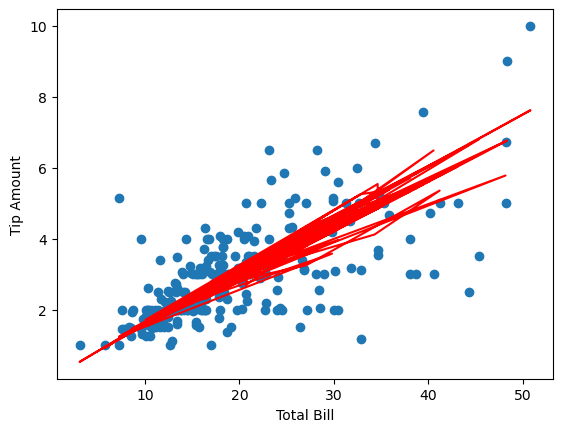

In [230]:
#variables used in scatter plot
x = df['total_bill']
y = df['tip']
regression_y = df['expected_tip']

#creating scatter plot
plt.scatter(x, y)
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')

#add regression line
plt.plot(x, regression_y, color = 'red')

The scatter plot for total bill and tip amount with the regression line generated from numpy library

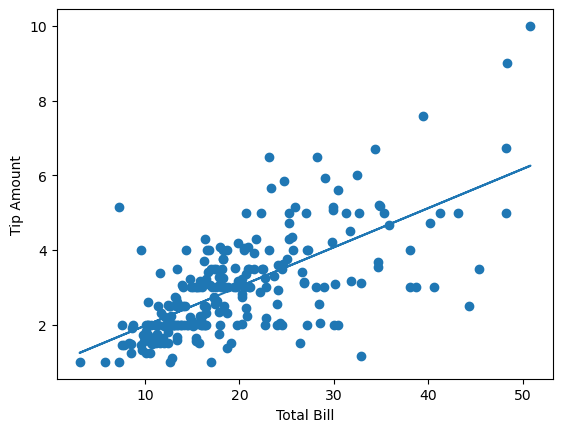

In [231]:
import numpy as np

#creating scatter plot
plt.scatter(x, y)
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')

#get slope and intercept of regression line
m, b = np.polyfit(x, y, 1)

#add the regression line
plt.plot(x, m*x+b)

GRAPH 4 FROM WIKIPEDIA PAGE
---------------------------
Tips and total bill based on gender and smoking section.

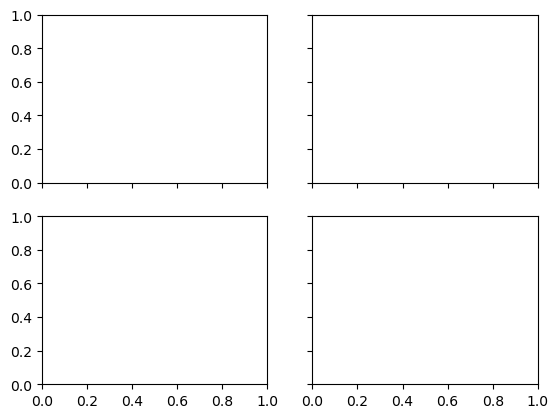

In [232]:
#create a new figure to have 4 scatter plots on one figure that will have same x-axis & y-axis
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)

Starting with ax1 dataframe based on sex and nonsmoker categories.
Then plotting ax1

In [258]:
#create a copy of the data frame to manipulate
df_ax1 = df.copy()

#filter out all data that is not female and non smoker
df_ax1=df_ax1[(df_ax1.sex == 'Female') & (df_ax1.smoker == 'No')]

#plot for this subset of data
x1 = df_ax1['total_bill']
y1 = df_ax1['tip']
ax1.set_title('F')
ax1.scatter(x1,y1)
ax1.plot(x, m*x+b)

Creating data frame for ax2 for male nonsmokers
Then plotting for ax2

In [259]:
#create a copy of the data frame to manipulate
df_ax2 = df.copy()

#filter out all data that is not female and non smoker
df_ax2[(df_ax2.sex == 'Male') & (df_ax2.smoker == 'No')]

#plot for this subset of data
x2 = df_ax2['total_bill']
y2 = df_ax2['tip']
ax2.set_title('M')
ax2.scatter(x2,y2)
ax2.plot(x, m*x+b)

Creating dataframe for ax3 for female smokers
then plotting for ax3

In [260]:
#create a copy of the data frame to manipulate
df_ax3 = df.copy()

#filter out all data that is not female and non smoker
df_ax3[(df_ax3.sex == 'Female') & (df_ax3.smoker == 'Yes')]

#plot for this subset of data
x3 = df_ax3['total_bill']
y3 = df_ax3['tip']
ax3.scatter(x3,y3)
ax3.plot(x, m*x+b)

creating dataframe for ax4 for male smokers
then plotting for ax4

In [261]:
#create a copy of the data frame to manipulate
df_ax4 = df.copy()

#filter out all data that is not female and nonsmoker
df_ax4[(df_ax4.sex == 'Male') & (df_ax4.smoker == 'Yes')]

#plot for this subset of data
x4 = df_ax4['total_bill']
y4 = df_ax4['tip']
ax4.scatter(x4,y4)
ax4.plot(x, m*x+b)

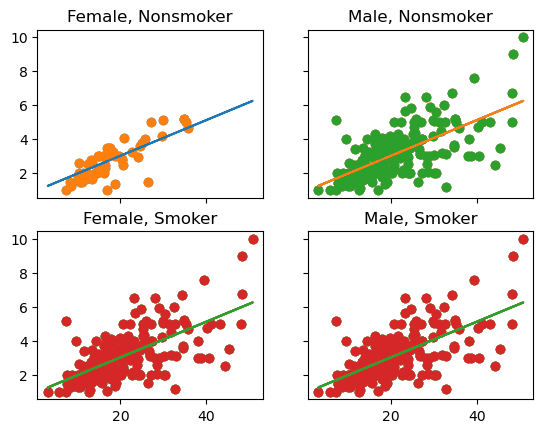

In [262]:
ax1.set_title('Female, Nonsmoker')
ax2.set_title('Male, Nonsmoker')
ax3.set_title('Female, Smoker')
ax4.set_title('Male, Smoker')
fig

GRAPH 4 - ANOTHER WAY
----------------------
Uses seaborn to create 4th figure
facetgrid to have more than one scatterplot in one figure.
facetgrid plots the conditional relationship

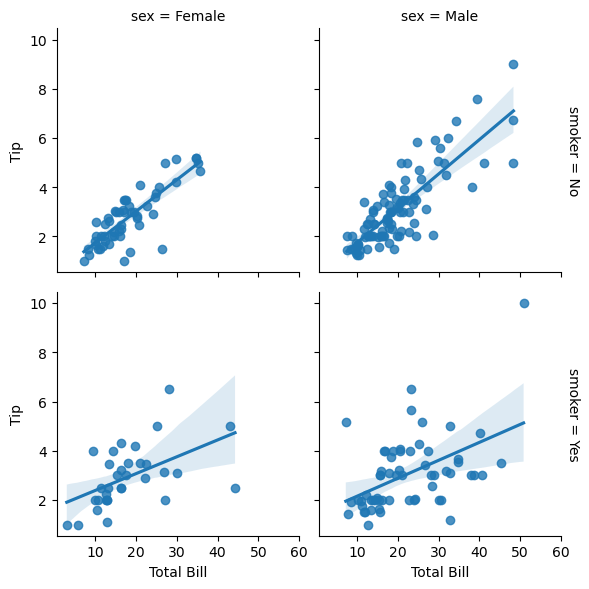

In [264]:
import seaborn as sns

#initialize with the dataframe and conditional variables
g = sns.FacetGrid(df, row="smoker", col="sex", margin_titles=True)
#apply plotting function for the variables bill and tip
g.map(sns.regplot,"total_bill", "tip")
g.set_axis_labels("Total Bill", "Tip")
g.set(xticks=[10, 20, 30, 40, 50, 60])